<a href="https://colab.research.google.com/github/AmiraliEsi83/Fashion-Dataset/blob/main/KaggleFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!unzip "/content/drive/MyDrive/Fashion/archive.zip"

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/Fashion/fashion-mnist_train.csv', sep=",")
fashion_test_df = pd.read_csv('/content/drive/MyDrive/Fashion/fashion-mnist_test.csv', sep=",")

print(fashion_train_df.shape, fashion_test_df.shape)
training = np.array(fashion_train_df, dtype="float32")
testing = np.array(fashion_test_df, dtype="float32")


(60000, 785) (10000, 785)


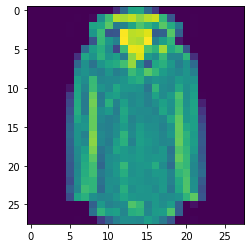

In [7]:
plt.imshow(training[22,1:].reshape(28,28))

In [8]:
label = training[22,0]

In [9]:
label

4.0

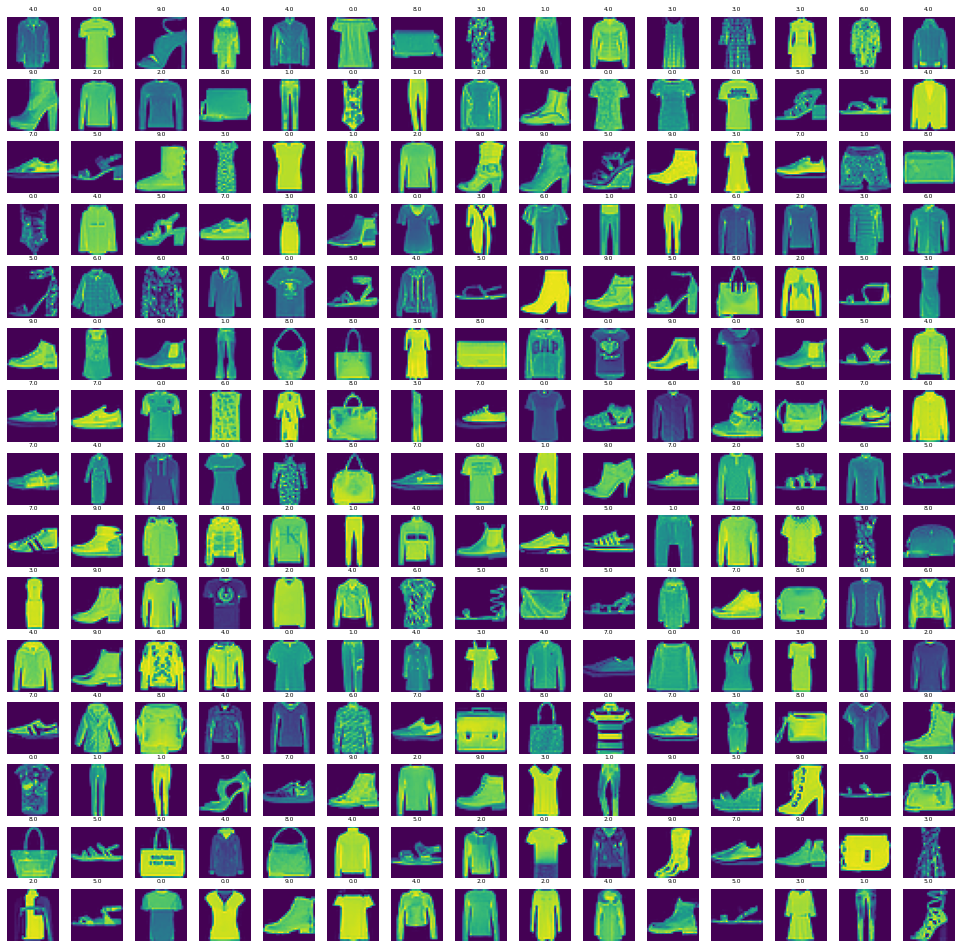

In [10]:
w_grid = 15
l_grid = 15


fig, axes = plt.subplots(w_grid, l_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0,w_grid * l_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index, 1:].reshape(28,28))
  axes[i].set_title(training[index, 0], fontsize = 6)
  axes[i].axis('off')

## Training The Model

In [11]:
X_train = training[:,1:]/255
len(X_train)

60000

In [12]:
y_train = training[:,0]
y_train
len(y_train)

60000

In [13]:
X_test = testing[:,1:]/255
y_test = testing[:,0]
len(y_test)

10000

In [14]:
train_X=np.dstack([X_train] * 3)
test_X=np.dstack([X_test]*3)
train_X.shape,test_X.shape

((60000, 784, 3), (10000, 784, 3))

In [15]:
# Reshape images as per the tensor format required by tensorflow
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [16]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
     

In [17]:

from keras.applications.vgg16 import preprocess_input
from skimage.transform import resize
def read_image_url(image, img_size=(224,224)):
  
  image = resize(image,img_size)
  image = image.reshape(( image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)

  return image


In [18]:
train_X = np.asarray([read_image_url(image, img_size=(224,224)) for image in train_X[0:1000]])
test_X = np.asarray([read_image_url(image, img_size=(224,224)) for image in test_X[0:1000]])

train_X.shape, test_X.shape

((1000, 224, 224, 3), (1000, 224, 224, 3))

In [19]:

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(train_X , y_train[0:1000], test_size=0.2, random_state=12345)

print(len(X_train))
len(X_validate)
print(X_train.shape)
X_validate.shape


800
(800, 224, 224, 3)


(200, 224, 224, 3)

In [20]:
X_train.shape  #array records

(800, 224, 224, 3)

In [21]:
# X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
# X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
# X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))
# X_train.shape


In [22]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam
import tensorflow as tf


In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation="relu"))
cnn_model.add(MaxPool2D((2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation="relu"))
cnn_model.add(Dense(10,activation="sigmoid"))

cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [25]:
history = cnn_model.fit(X_train, y_train[0:1000], epochs=10, 
                    validation_data=(X_validate, y_validate))

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 [==============================] - 37s 440ms/step - loss: 25.2339 - accuracy: 0.0988 - val_loss: 2.3024 - val_accuracy: 0.1250
Epoch 2/10
25/25 [==============================] - 10s 402ms/step - loss: 2.3022 - accuracy: 0.0900 - val_loss: 2.3019 - val_accuracy: 0.1250
Epoch 3/10
25/25 [==============================] - 10s 403ms/step - loss: 2.3018 - accuracy: 0.1088 - val_loss: 2.3015 - val_accuracy: 0.1250
Epoch 4/10
25/25 [==============================] - 10s 403ms/step - loss: 2.3013 - accuracy: 0.1088 - val_loss: 2.3010 - val_accuracy: 0.1250
Epoch 5/10
25/25 [==============================] - 10s 384ms/step - loss: 2.3010 - accuracy: 0.1088 - val_loss: 2.3001 - val_accuracy: 0.1250
Epoch 6/10
25/25 [==============================] - 10s 407ms/step - loss: 2.3006 - accuracy: 0.1088 - val_loss: 2.3000 - val_accuracy: 0.1250
Epoch 7/10
25/25 [==============================] - 10s 407ms/step - loss: 2.3005 - accuracy: 0.1088 - val_loss: 2.2996 - val_accuracy: 0.1250
Epoch 8/1

In [26]:

evaluation = cnn_model.evaluate(test_X,y_test[0:1000])
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

32/32 [==============================] - 4s 113ms/step - loss: 2.3023 - accuracy: 0.1040
Test accuracy: 10.40%


In [27]:

predicted_classes = cnn_model.predict(test_X)
len(predicted_classes)

32/32 [==============================] - 4s 107ms/step


1000

In [28]:

print(predicted_classes[0])
y_test[0]

[0.5057843  0.48052105 0.5137591  0.5195849  0.50600255 0.47625127
 0.5127608  0.5011135  0.5000013  0.49139982]


0.0

In [29]:

np.argmax(predicted_classes[0])

3

In [30]:
y_test[0]

0.0

(25,)


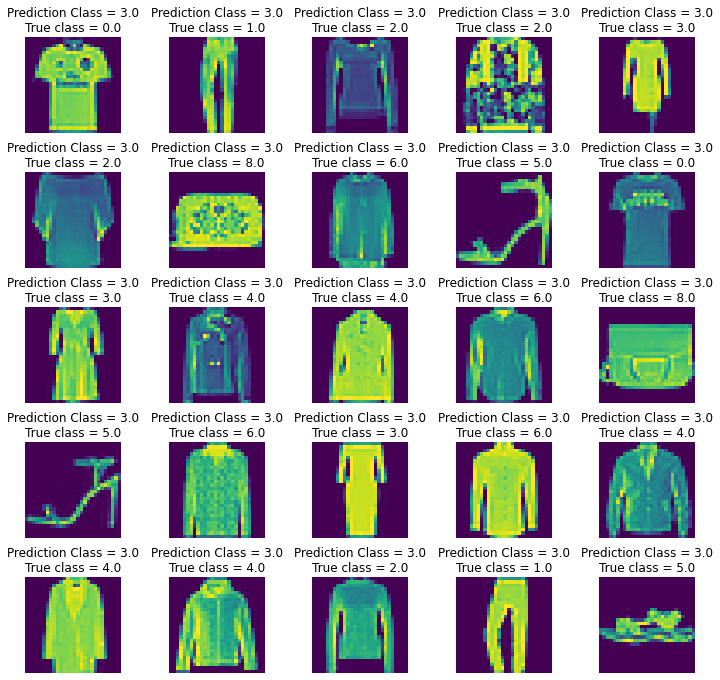

In [31]:
fig, axes = plt.subplots(5,5,figsize=(12,12))
axes = axes.ravel()
print(axes.shape)
X_test[0].shape
for i in np.arange(0,25):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title(f"Prediction Class = {np.argmax(predicted_classes[i]):.1f}\nTrue class = {y_test[i]}")


  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)